#### 数据集加载

In [2]:
import seisbench.data as sbd

# 打印所有数据集类
print("数据集类:")
for name in dir(sbd):
    if name.endswith("Dataset") and not name.startswith("_"):
        print(f"- {name}")

d:\LLM\LangChain\.conda\Lib\site-packages\seisbench\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


数据集类:
- BenchmarkDataset
- ChunkedDummyDataset
- DummyDataset
- MultiWaveformDataset
- WaveformDataset


d:\LLM\LangChain\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = sbd.DummyDataset()
print(data)

2025-07-30 10:37:40,645 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


DummyDataset - 100 traces


In [4]:
import seisbench
import os
print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
print("dummydataset:", os.listdir(seisbench.cache_root / "datasets" / "dummydataset"))

Cache root: C:\Users\PC\.seisbench
Contents: ['config.json', 'datasets', 'models']
datasets: ['dummydataset', 'stead']
dummydataset: ['metadata.csv', 'raw_catalog.csv', 'waveforms.hdf5']


In [5]:
dummy_from_disk = sbd.WaveformDataset(seisbench.cache_root / "datasets" / "dummydataset")
print(dummy_from_disk)

2025-07-30 10:37:40,670 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


Unnamed dataset - 100 traces


#### 数据集内容

In [6]:
data.metadata

,index,trace_start_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_event_category,source_magnitude,source_magnitude_uncertainty,source_magnitude2,source_magnitude_uncertainty2,...,station_latitude_deg,station_longitude_deg,station_elevation_m,source_magnitude_type,source_magnitude_type2,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
0,0,2007/01/01 01:42:45.08,-20.43802,-69.27681,83.18,ID,1.353,0.014,1.426,0.011,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 01_42_45_08,,20,ZNE
1,1,2007/01/01 02:41:13.75,-21.64059,-68.41443,118.38,ID,1.981,0.020,2.027,0.023,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 02_41_13_75,,20,ZNE
2,2,2007/01/01 03:50:29.27,-21.84637,-68.53904,111.82,ID,2.719,0.024,2.811,0.026,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 03_50_29_27,,20,ZNE
3,3,2007/01/01 05:40:02.55,-21.23950,-70.05063,34.95,UP,2.169,0.020,2.269,0.020,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 05_40_02_55,,20,ZNE
4,4,2007/01/01 05:52:18.43,-21.81511,-68.65773,106.69,ID,2.028,0.021,2.080,0.024,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 05_52_18_43,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2007/01/07 05:19:53.63,-21.02248,-68.96970,109.05,ID,1.464,0.016,1.513,0.021,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 05_19_53_63,,20,ZNE
96,96,2007/01/07 05:25:44.43,-20.06507,-69.15500,93.64,ID,1.606,0.024,1.660,0.026,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 05_25_44_43,,20,ZNE
97,97,2007/01/07 06:37:03.33,-21.13000,-68.90223,110.59,ID,1.530,0.012,1.574,0.013,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 06_37_03_33,,20,ZNE
98,98,2007/01/07 06:39:20.08,-21.26966,-68.73751,120.06,ID,3.514,0.035,3.584,0.032,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 06_39_20_08,,20,ZNE


waveforms.shape: (3, 1200)


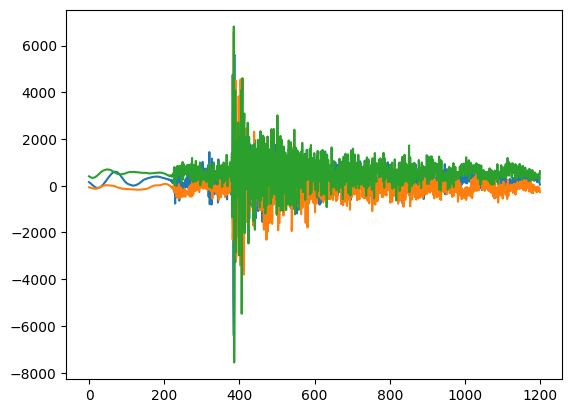

In [7]:
waveforms = data.get_waveforms(3)
print("waveforms.shape:", waveforms.shape)

import matplotlib.pyplot as plt
plt.plot(waveforms.T);

In [8]:
waveforms = data.get_waveforms([3, 20, 45, 70])
print("waveforms.shape:", waveforms.shape)

waveforms.shape: (4, 3, 1200)


#### 数据集筛选

In [9]:
mask = data.metadata["source_magnitude"] > 2.5  # Only select events with magnitude above 2.5
data.filter(mask)

print(data)
data.metadata

DummyDataset - 18 traces


,index,trace_start_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_event_category,source_magnitude,source_magnitude_uncertainty,source_magnitude2,source_magnitude_uncertainty2,...,station_latitude_deg,station_longitude_deg,station_elevation_m,source_magnitude_type,source_magnitude_type2,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
2,2,2007/01/01 03:50:29.27,-21.84637,-68.53904,111.82,ID,2.719,0.024,2.811,0.026,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 03_50_29_27,,20,ZNE
12,12,2007/01/01 19:18:54.92,-20.88456,-69.11791,108.41,ID,2.552,0.020,2.619,0.020,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 19_18_54_92,,20,ZNE
14,14,2007/01/01 21:11:09.82,-21.63269,-68.38868,112.08,ID,2.668,0.017,2.715,0.016,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 21_11_09_82,,20,ZNE
19,19,2007/01/02 05:48:36.29,-21.12592,-68.51042,138.29,ID,2.945,0.023,2.958,0.026,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_02 05_48_36_29,,20,ZNE
27,27,2007/01/02 21:23:35.54,-19.80149,-69.15909,115.70,ID,2.690,0.034,2.741,0.045,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_02 21_23_35_54,,20,ZNE
35,35,2007/01/03 06:20:44.24,-19.83229,-69.00765,107.70,ID,3.088,0.040,3.193,0.039,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_03 06_20_44_24,,20,ZNE
49,49,2007/01/04 00:34:38.83,-22.36096,-70.38094,63.18,P3,3.629,0.013,3.765,0.017,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_04 00_34_38_83,,20,ZNE
54,54,2007/01/04 02:54:38.63,-19.48479,-69.42889,103.58,ID,4.069,0.035,4.232,0.038,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_04 02_54_38_63,,20,ZNE
59,59,2007/01/04 07:22:00.83,-20.21715,-69.18168,98.02,ID,2.780,0.020,2.852,0.028,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_04 07_22_00_83,,20,ZNE
63,63,2007/01/04 11:43:04.62,-20.91954,-69.18556,108.42,ID,2.987,0.032,3.021,0.038,...,-21.04323,-69.4874,900.0,MA,ML,dev,2007_01_04 11_43_04_62,,20,ZNE


In [10]:
data = sbd.DummyDataset() # Reload to ensure we have the full dataset again

train = data.train()
dev = data.dev()
test = data.test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

2025-07-30 10:43:19,736 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


Train: DummyDataset - 60 traces
Dev: DummyDataset - 10 traces
Test: DummyDataset - 30 traces


In [11]:
train, dev, test = data.train_dev_test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

Train: DummyDataset - 60 traces
Dev: DummyDataset - 10 traces
Test: DummyDataset - 30 traces


#### 数据集可视化

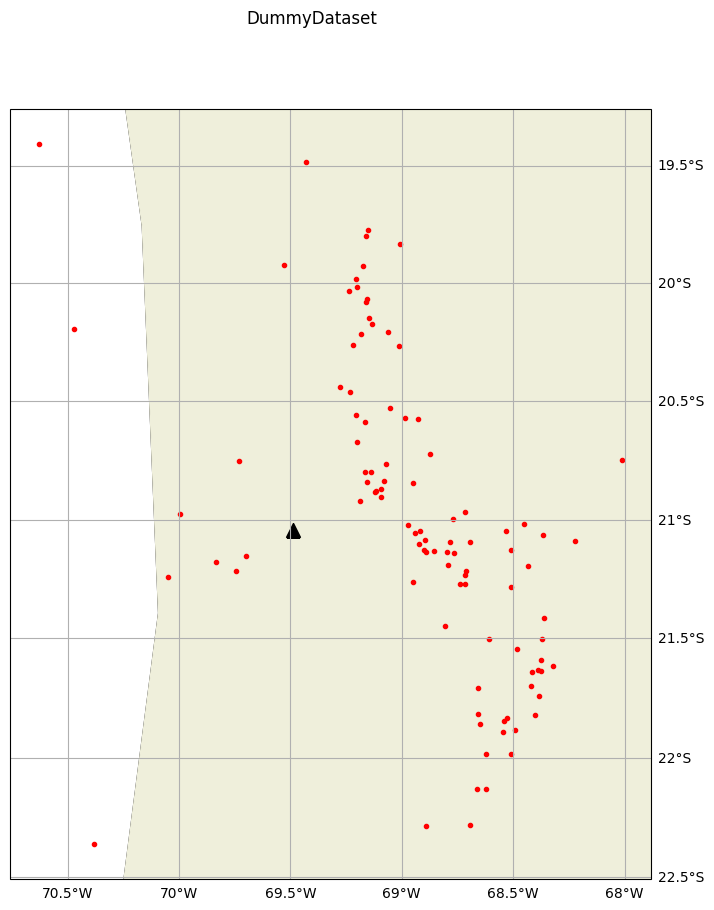

In [12]:
data.plot_map();